<a href="https://colab.research.google.com/github/joaorodriguessneto/NLP_SENTIMENTOS_APRENDIZADO/blob/main/NLP_SENTIMENTOS_APRENDIZADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimento para aprendizado de Processamento de Linguagem Natural

### Este projeto tem como objetivo o aprimoramento das técnicas de Processamento de Linguagem Natural (NLP) aplicadas a DataFrames contendo dados textuais. O trabalho consiste em realizar o pré-processamento dos textos, contemplando etapas fundamentais como: remoção de pontuações e caracteres especiais, normalização para caixa baixa (lowercasing), bem como a eliminação de termos de baixa relevância semântica para os modelos, tais como adjetivos, preposições e palavras de parada (stopwords). Essas transformações visam reduzir ruídos, otimizar a qualidade dos dados e aumentar a eficiência dos algoritmos de aprendizado de máquina aplicados posteriormente.

In [1]:
import pandas as pd

* # Importando DataFrame

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv')
df

ID_avaliacao                                          avaliacao  nota  \
0             81841  Esse smartphone superou minhas expectativas, r...     5   
1             28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2             91332  Eu fiz a compra a loja não entregou o produto,...     1   
3            110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4             36929  Gostei muito, só achei que ficou a desejar a q...     5   
...             ...                                                ...   ...   
15496         61836  Bommm.mmmmmmmmmmmmmmmm Mmmmmmmmmmmmmmmmmmmmmmm...     4   
15497         19503  O produto seca o cabelo, mas tem que passar di...     2   
15498         52712  Muito simples de mexer, o manual explica direi...     5   
15499         10874  Produto muito bom, exatamente como na internet...     4   
15500        107286  É incrível como voce é abandonado dentro de su...     5   

      sentimento  
0       positivo  
1       negativo  
2       negativo  
3       positivo  
4       positivo  
...          ...  
15496   positivo  
15497   negativo  
15498   positivo  
15499   positivo  
15500   positivo  

[15501 rows x 4 columns]

In [3]:
df.shape

(15501, 4)

In [4]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

### O CountVectorizer é um método de vetorização de texto utilizado em Processamento de Linguagem Natural (NLP), responsável por converter documentos textuais em matrizes numéricas de frequências de termos, permitindo que esses dados sejam interpretados e processados por algoritmos de aprendizado de máquina.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

### O Bag of Words (BoW) é uma técnica de representação textual em NLP que converte documentos em vetores numéricos, baseando-se apenas na frequência de ocorrência das palavras, sem considerar a ordem ou o contexto em que aparecem. Essa abordagem cria um vocabulário de termos e representa cada documento como um vetor, em que cada posição corresponde a um termo do vocabulário e o valor indica a quantidade de vezes que ele ocorre no texto.

In [6]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

### Uma matriz sparse é uma estrutura de dados que contém muitos valores iguais a zero e poucos valores diferentes de zero. Em NLP, por exemplo, representações como Bag of Words e CountVectorizer geram matrizes esparsas, já que cada documento utiliza apenas uma pequena fração do vocabulário total. Esse formato é eficiente porque economiza memória e processamento.

In [7]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [8]:
matriz_esparsa

comprei  produto  ruim  um  ótimo
0        1        1     0   1      1
1        1        1     1   1      0

In [9]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 23352)


In [10]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 50)


In [11]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa_avaliacoes

Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

In [12]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, df.sentimento, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)
acuracia = regressao_logistica.score(x_teste, y_teste)
print(f'Acurácia: {acuracia*100:.2f}%')

Acurácia: 80.08%


### A métrica de acurácia inicial, obtida sem qualquer pré-processamento textual, apresentou um resultado de 80,08%. A partir deste ponto, serão aplicadas técnicas de pré-processamento nos dados textuais com o objetivo de avaliar o impacto dessas transformações na melhoria do desempenho do modelo.

## O WordCloud é uma técnica de visualização que analisa um conjunto de textos e destaca as palavras mais frequentes em forma de nuvem, onde o tamanho de cada termo é proporcional à sua ocorrência. Essa abordagem permite identificar rapidamente os principais temas e termos dominantes do texto, sendo muito útil na análise exploratória de dados textuais.

In [14]:
from wordcloud import WordCloud

In [15]:
todas_palavras = [texto for texto in df.avaliacao]

In [16]:
todas_palavras

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [17]:
todas_palavras = ' '.join([texto for texto in df.avaliacao])

In [18]:
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

In [19]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [20]:
import matplotlib.pyplot as plt

## Plotando Gráfico de Nuvem de Palavras

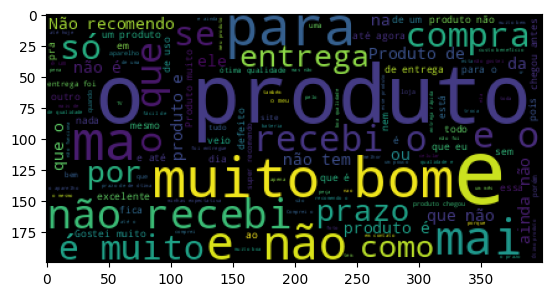

In [21]:
plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

## Ajustando gráfico e propriedades visuais

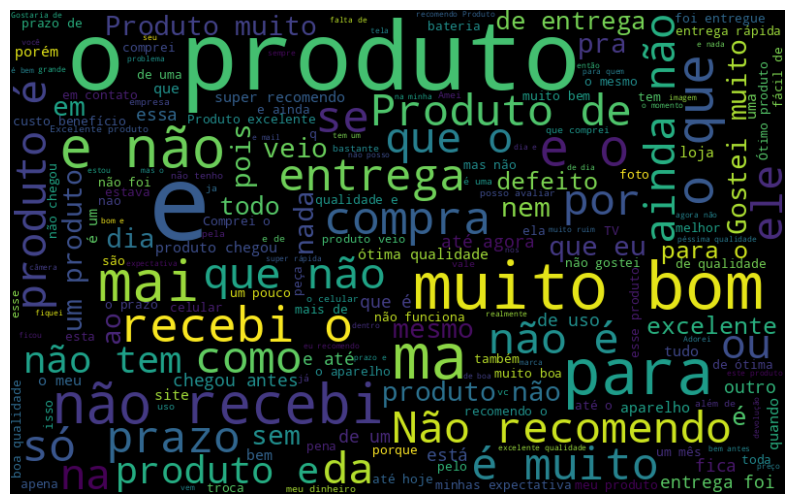

In [22]:
nuvem_palavras = WordCloud(width=800, height=500 , max_font_size = 110).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

## Retirando a coligação das palavras

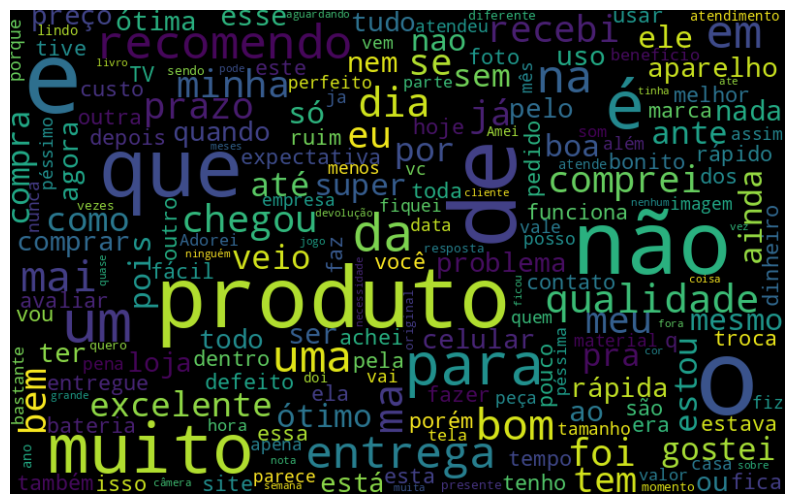

In [23]:
nuvem_palavras = WordCloud(width=800, height=500 , max_font_size = 110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
def nuvem_palavras(texto, coluna_texto, sentimento):
  texto_sentimento = texto.query(f"sentimento =='{sentimento}'")[coluna_texto]

  texto_unido = ' '.join(texto_sentimento)

  nuvem_palavras = WordCloud(width=800, height=500 , max_font_size = 110, collocations=False).generate(texto_unido)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

## Nuvem de palavras Negativa

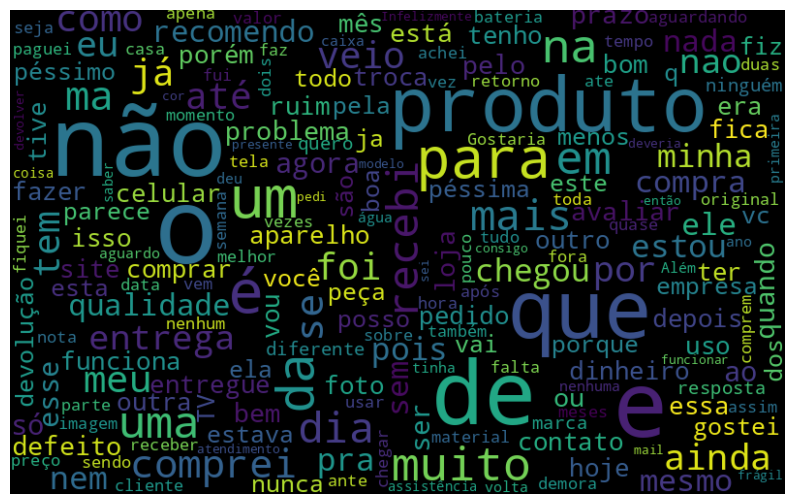

In [25]:
nuvem_palavras(df, 'avaliacao', 'negativo')

## Nuvem de palavras Positiva

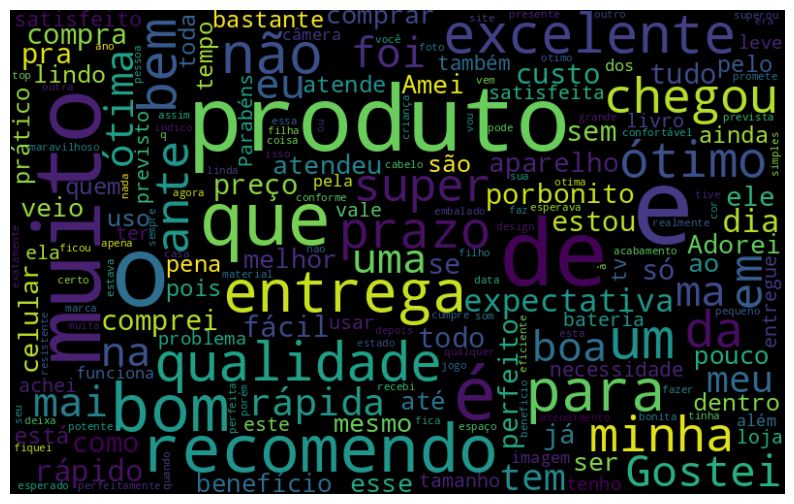

In [26]:
nuvem_palavras(df, 'avaliacao', 'positivo')

In [27]:
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

In [28]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [29]:
frases = ['um produto bom', 'um produto ruim']

frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um produto bom': 1, 'um produto ruim': 1})

## Tokenizar palavras

In [30]:
from nltk import tokenize

In [31]:
frase = 'O produto é excelente e a entrega foi muito rápida!'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['O', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida!']


In [32]:
token_frase = token_espaco.tokenize(todas_palavras)

In [33]:
token_frase

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu',
 'minhas',
 'expectativas,',
 'só',
 'achei',
 'a',
 'luz',
 'ruim,',
 'mas',
 'nada',
 'que',
 'dificulte',
 'seu',
 'funcionamento.',
 'Gostei',
 'muito,',
 'só',
 'achei',
 'que',
 'ficou',
 'a',
 'desejar',
 'a',
 'qualidade',
 'das',
 'fotos.',
 'Achei',
 'que',
 'fosse',
 'bem',
 'melhor',
 '.',
 'Comprei',
 'o',
 'produto',
 'e',
 'ñ',
 'tinha',
 'para',
 'entrega',
 'isso',
 'não',
 'foi',
 'legal!!!!!!',
 'o',
 'produto',
 'pode',
 'até',
 'ser',
 'bom',
 ',mais',
 'só',
 'posso',
 'avalia-lo',
 'depo

## Aqui podemos analisar que temos muitas conjunções, adjetivos, preposições, em que não vão me ajudar no meu modelo.

In [34]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [35]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                              'Frequência':list(frequencia.values())})

In [36]:
df_frequencia.head(10).reset_index()

index        Palavra  Frequência
0      0           Esse         101
1      1     smartphone          33
2      2        superou          90
3      3         minhas         533
4      4  expectativas,          79
5      5      recomendo         919
6      6              o       10865
7      7         cheiro          62
8      8              e       11813
9      9          muito        4328

In [37]:
df_frequencia.nlargest(columns='Frequência', n=10)

Palavra  Frequência
8          e       11813
6          o       10865
29        de       10280
19         a        8873
46       que        7657
22       não        7286
163        é        4786
63   produto        4765
177      com        4641
130       do        4583

In [38]:
import seaborn as sns

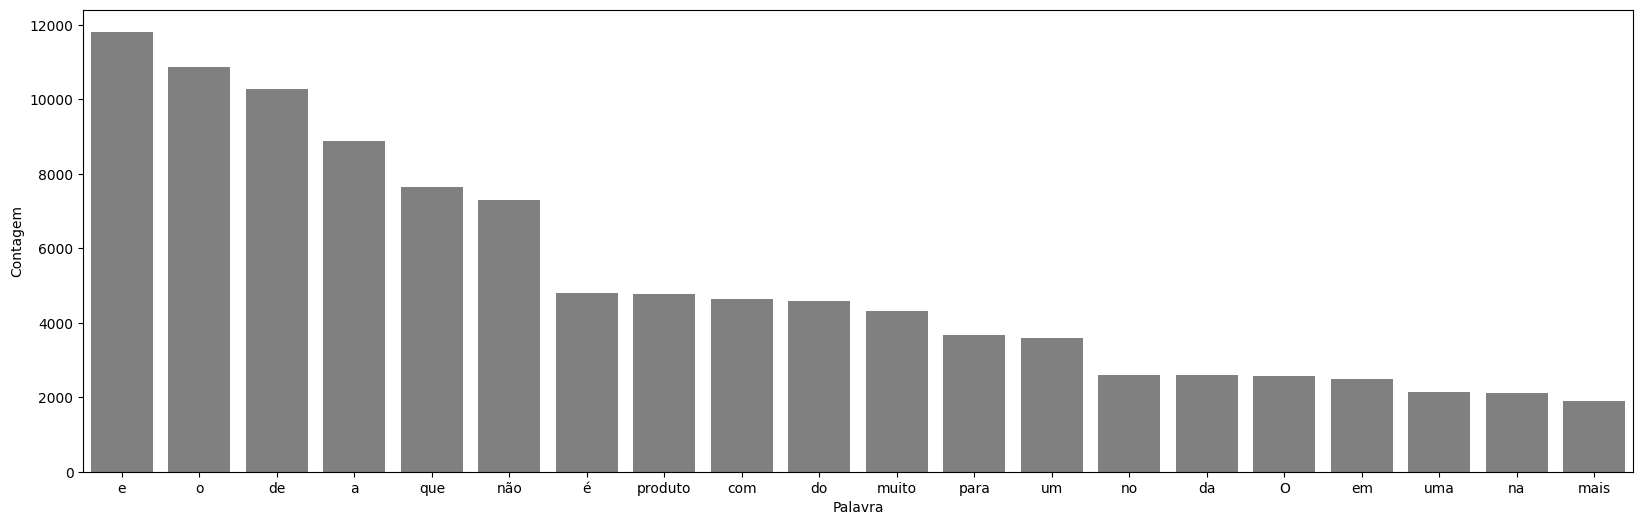

In [39]:
plt.figure(figsize=(20,6))
ax = sns.barplot(data = df_frequencia.nlargest(columns='Frequência', n=20), x='Palavra',y='Frequência',color ='gray')
ax.set(ylabel='Contagem')
plt.show()


## Podemos observar que essas palavras funcionam apenas como conectivos e não agregam valor ao modelo, portanto, será necessário tratá-las para melhorar a qualidade dos resultados.

In [40]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [41]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

* # Tratamento 1

In [42]:
frase_processada = []

for opiniao in df.avaliacao:
  palavras_texto = token_espaco.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_1'] = frase_processada

In [43]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  
0   positivo    Esse smartphone superou expectativas, recomendo  
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...  
2   negativo  Eu fiz compra loja entregou produto, compra fe...  
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...  
4   positivo  Gostei muito, achei ficou desejar qualidade fo...

## No Tratamento 1, realizamos nossa primeira etapa de melhoria ao identificar conectivos, adjetivos, pronomes e outras palavras irrelevantes que não contribuíam para o desempenho do modelo, removendo-as do texto para aprimorar a qualidade da análise.

In [44]:
df['avaliacao'][0]

'Esse smartphone superou minhas expectativas, recomendo'

In [45]:
df['tratamento_1'][0]

'Esse smartphone superou expectativas, recomendo'

In [46]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
  x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(x_treino, y_treino)
  acuracia = regressao_logistica.score(x_teste, y_teste)
  return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia *100:.2f}%")

In [47]:
classificar_texto(df, 'tratamento_1', 'sentimento')

Acurácia do modelo com 'tratamento_1': 81.76%


## Só com o Tratamento 1, já obtivemos um ganho de 1,68% na acurácia do modelo, evidenciando o impacto positivo dessa etapa de limpeza e preparação dos dados.

In [48]:
def grafico_frequencia(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_espaco = tokenize.WhitespaceTokenizer()
  frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
  df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                              'Frequência':list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns='Frequência', n=quantidade)
  plt.figure(figsize=(20,6))
  ax = sns.barplot(data = df_frequencia, x='Palavra',y='Frequência',color ='gray')
  ax.set(ylabel='Contagem')
  plt.show()

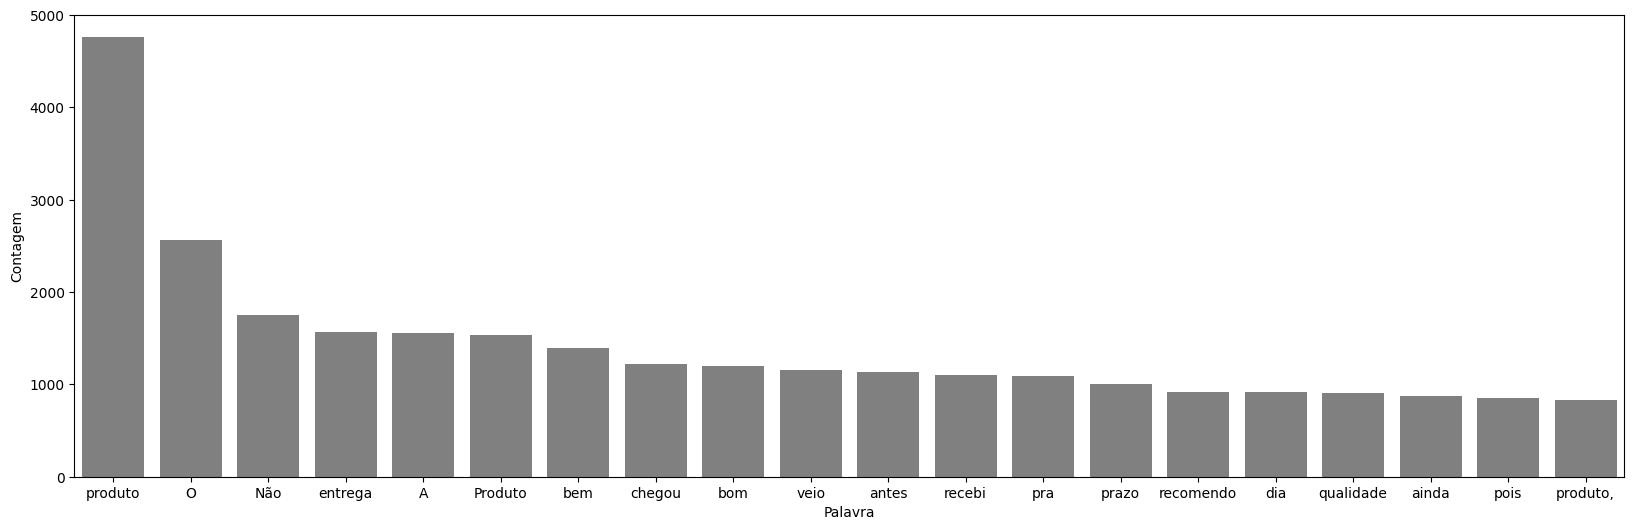

In [49]:
grafico_frequencia(df, 'tratamento_1', 20)

## Ainda é possível observar a presença de algumas palavras irrelevantes, como artigos, o que ocorre porque elas estão em caixa alta. No Tratamento 1, a remoção foi aplicada apenas às palavras em caixa baixa, permitindo que essas variações em maiúsculas permanecessem no texto. Além disso, podemos também analisar palavras como "produto," que estão com pontuação e isso pode atrapalhar nosso modelo, assim vamos também retirá-las.

In [50]:
frase = 'Esse smartphone superou expectativas, recomendo'

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']


* # Tratamento 2

## No Tratamento 2, removeremos as pontuações das palavras utilizando o isalpha(), que filtra os tokens para manter apenas aqueles compostos exclusivamente por letras, evitando que caracteres indesejados interfiram no desempenho do modelo.

In [51]:
frase_processada = []

for opiniao in df['tratamento_1']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

In [52]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  
0     Esse smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [53]:
df['tratamento_1'][10]

'Melhor esperado, cor maravilhosa! Recomendo. Deixa ambiente moderno'

In [54]:
df['tratamento_2'][10]

'Melhor esperado cor maravilhosa Recomendo Deixa ambiente moderno'

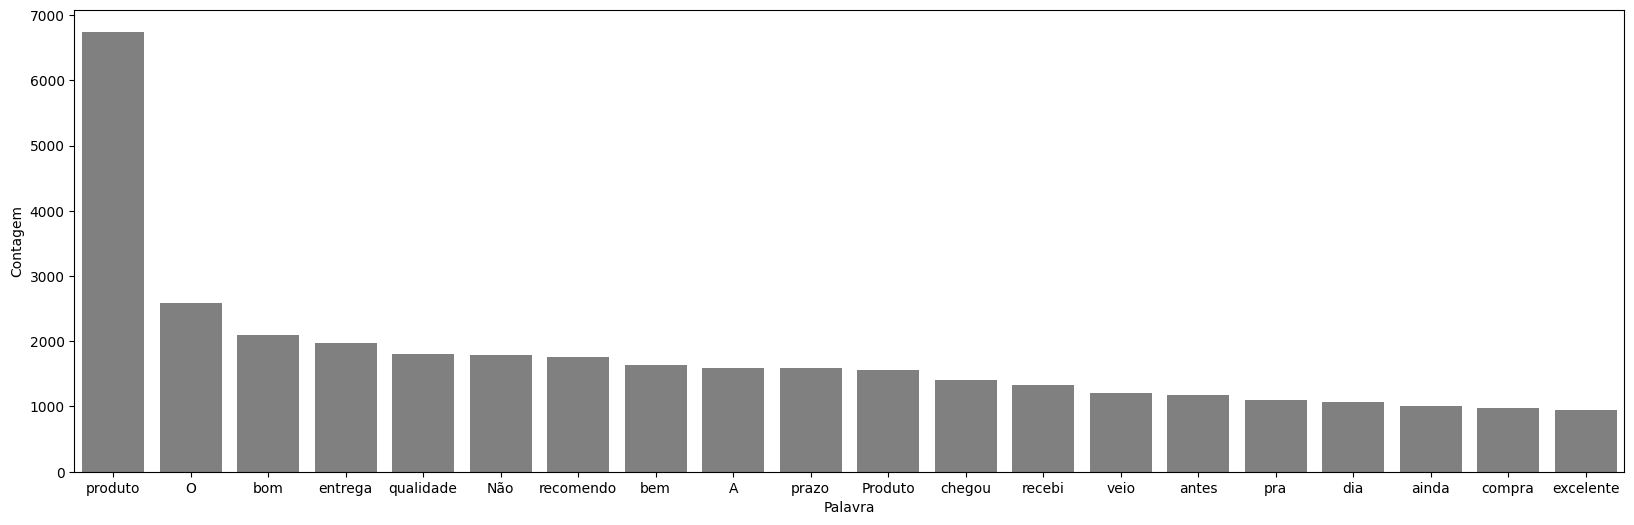

In [55]:
grafico_frequencia(df, 'tratamento_2', 20)

* # Tratamento 3

## No Tratamento 3, removeremos os acentos das palavras utilizando a biblioteca Unidecode, garantindo maior uniformidade no texto para o modelo.

In [56]:
! pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.3 MB/s eta 0:00:00


In [57]:
import unidecode

frase = 'Um aparelho ótima performance preço bem menor outros aparelhos marcas conhecidas performance semelhante'
teste = unidecode.unidecode(frase)
print(teste)

Um aparelho otima performance preco bem menor outros aparelhos marcas conhecidas performance semelhante


In [58]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['tratamento_2']]

In [59]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [60]:
df['tratamento_3'] = sem_acentos

frase_processada = []
for opiniao in df['tratamento_3']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_3'] = frase_processada

In [61]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  
0     Esse smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [62]:
df['tratamento_2'][70]

'Melhor compra fiz últimos tempos Produto barato útil Produto robusto leve O teclado proporciona digitação confortável mouse preciso O teclado mouse usam apenas receptor economizando número portas USB computador Me livrei incomodo fios espaço trabalho ficou limpo harmonioso Ademais tudo parece bastante durável safisfeito Recomendo todos'

In [63]:
df['tratamento_3'][70]

'Melhor compra fiz ultimos tempos Produto barato util Produto robusto leve O teclado proporciona digitacao confortavel mouse preciso O teclado mouse usam apenas receptor economizando numero portas USB computador Me livrei incomodo fios espaco trabalho ficou limpo harmonioso Ademais tudo parece bastante duravel safisfeito Recomendo todos'

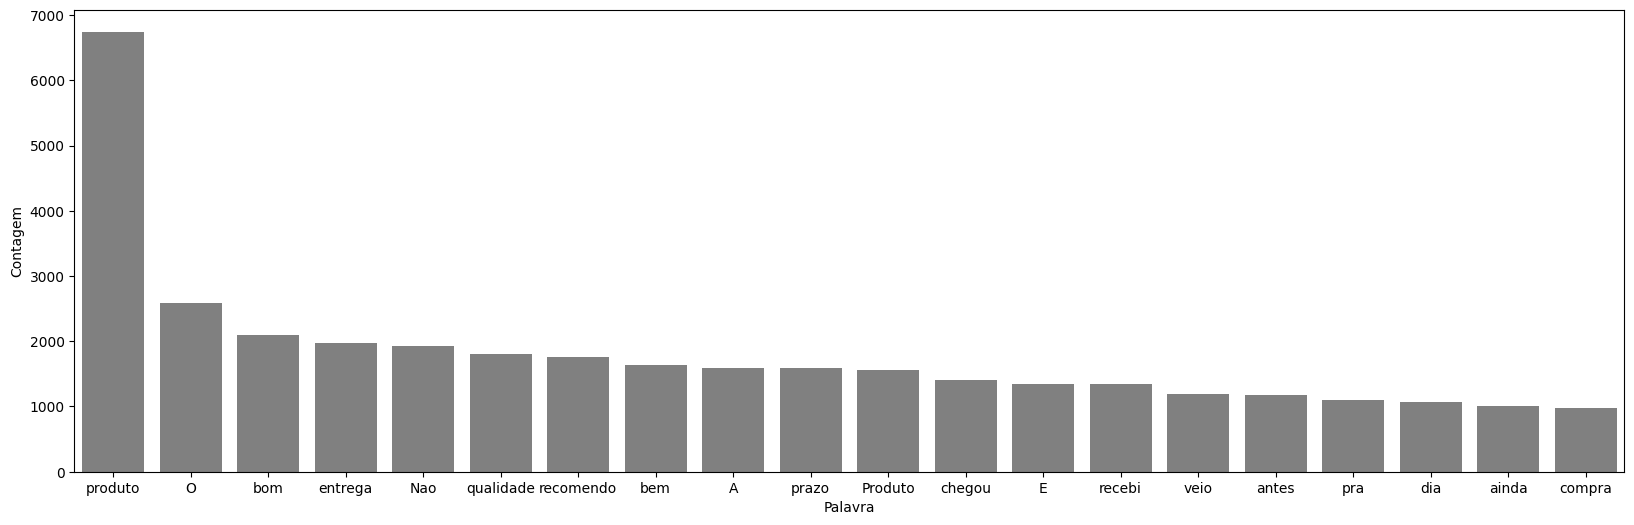

In [64]:
grafico_frequencia(df, 'tratamento_3', 20)

## Pelo gráfico acima, podemos observar que, após o Tratamento 3, as palavras não apresentam mais acentuação.

* # Tratamento 4

## No Tratamento 4, aplicaremos a função lower, que transforma todas as palavras do texto que estão em caixa alta para caixa baixa, garantindo consistência na análise.

In [65]:
frase = 'Bom produto otimo custo beneficio Recomendo Confortavel bem acabado'
print(frase.lower())

bom produto otimo custo beneficio recomendo confortavel bem acabado


In [66]:
frase_processada = []
for opiniao in df['tratamento_3']:
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada

In [67]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  
0          smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  fiz compra loja entregou produto compra feita ...  
3  atendeu expectativas achei luz ruim nada dific...  
4  gostei achei ficou desejar qualidade fotos ach...

In [68]:
df['tratamento_3'][3]

'Atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [69]:
df['tratamento_4'][3]

'atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [70]:
classificar_texto(df, 'tratamento_4', 'sentimento')

Acurácia do modelo com 'tratamento_4': 83.05%


## Podemos observar que, após a aplicação das seguintes etapas de pré-processamento:

  * Tokenização do texto para segmentar as palavras em unidades manipuláveis

  * Remoção de palavras irrelevantes utilizando stopwords em português

  * Eliminação de pontuação por meio de isalpha() para manter apenas caracteres alfabéticos

  * Normalização de acentuação com Unidecode

  * Conversão para caixa baixa (lower) para uniformizar os tokens

## o modelo apresentou um aumento de 2,97% na acurácia, evidenciando que o pré-processamento textual teve um efeito cumulativo positivo, melhorando a qualidade dos dados e a capacidade preditiva do modelo.

* # Tratamento 5

### Stemming é o processo de reduzir uma palavra ao seu radical ou raiz, com o objetivo de evitar inconsistências nos dados causadas por variações da mesma palavra. Por exemplo:

### "Eu gostei do produto" ≠ "Embora eu tenha gostado do produto..."

O stemming ajuda o modelo a reconhecer que “gostei” e “gostado” compartilham o mesmo radical, tratando-os de forma consistente.

In [71]:
stemmer = nltk.RSLPStemmer()

stemmer.stem('gostei')

'gost'

In [72]:
stemmer.stem('gostado')

'gost'

In [73]:
stemmer.stem('gostou')

'gost'

In [74]:
frase_processada = []

for opiniao in df['tratamento_4']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_5'] = frase_processada

In [75]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  \
0          smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  fiz compra loja entregou produto compra feita ...   
3  atendeu expectativas achei luz ruim nada dific...   
4  gostei achei ficou desejar qualidade fotos ach...   

                                        tratamento_5  
0                       smartphon super expect recom  
1              cheir desagrada pra incomod recomendo  
2  fiz compr loj entreg produt compr feit carta c...  
3     atend expect ach luz ruim nad dificult funcion  
4         gost ach fic desej qual fot ach bem melhor

In [76]:
df['tratamento_4'][53]

'otimo produto faltou maior alguns pois visualizacao especificacao produtos pra ter real dimensao mesmos'

In [77]:
df['tratamento_5'][53]

'otim produt falt mai algum poi visualizaca especificaca produt pra ter real dimensa mesm'

In [78]:
classificar_texto(df, 'tratamento_5', 'sentimento')

Acurácia do modelo com 'tratamento_5': 85.32%


### Após a etapa inicial de pré-processamento, o modelo apresentou uma acurácia de 83,05%, refletindo um bom desempenho inicial. Em seguida, implementei a técnica de stemming, que reduz as palavras ao seu radical, eliminando variações morfológicas e tornando os dados textuais mais consistentes. Essa etapa adicional resultou em um avanço significativo: a acurácia subiu para 85,32%, representando um ganho de 2,27%. Esses resultados demonstram o impacto direto que o stemming exerce na melhoria da qualidade dos dados textuais e na performance do modelo preditivo.

* # Tratamento 6

## TF-IDF (Term Frequency – Inverse Document Frequency) é uma técnica que transforma as palavras de um texto em números, mostrando o quanto cada termo é importante. Ela funciona dando mais peso às palavras que aparecem muitas vezes em um texto, mas que são raras nos outros, pois essas costumam ter maior relevância para o significado. Já palavras muito comuns, como “o”, “de” ou “em”, recebem peso menor, porque não ajudam tanto a diferenciar os textos. Com isso, o modelo consegue entender melhor quais palavras estão realmente relacionadas com a variável que queremos prever.

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
frases = ['Comprei um ótimo produto', 'Comprei um produto péssimo']
tfidf = TfidfVectorizer(lowercase=False, max_features =50)
matriz = tfidf.fit_transform(frases)
pd.DataFrame(matriz.todense(),
             columns=tfidf.get_feature_names_out())

Comprei   produto   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [80]:
tfidf_bruto = tfidf.fit_transform(df['avaliacao'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, df['sentimento'], random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_bruto = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia: {acuracia_tfidf_bruto*100:.2f}%')

Acurácia: 80.03%


In [81]:
tfidf_tratados = tfidf.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, df['sentimento'], random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_tratados = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia: {acuracia_tfidf_tratados*100:.2f}%')

Acurácia: 85.68%


* # Tratamento 7

## N-grams são uma técnica de representação de texto que consiste em dividir uma sequência de palavras em grupos de n termos consecutivos, permitindo capturar melhor o contexto e a relação entre palavras em um texto. Enquanto métodos simples analisam cada palavra isoladamente, o uso de n-grams (como bigrams e trigrams) revela padrões linguísticos e estruturas semânticas mais ricas, essenciais para melhorar a performance de modelos de NLP.

In [82]:
from nltk import ngrams

# Exemplo

frase = 'Comprei um produto ótimo'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'produto'), ('produto', 'ótimo')]

In [83]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 50 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 50 features e ngrams: 85.50%


### Utilizando apenas 50 features conseguimos uma acurácia de 85.5%, o que é bom mas podemos melhorar.

In [84]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2))
vetor_tfidf = tfidf_100.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 100 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 100 features e ngrams: 88.08%


### Utilizando dessa vez 100 features conseguimos uma acurácia de 88.08%, em que conseguimos um aumento de 2,58%.

In [90]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))
vetor_tfidf = tfidf_1000.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 1000 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 1000 features e ngrams: 92.03%


### Utilizando dessa vez 1000 features obtivemos uma acurácia de 92,03%, em que conseguimos um aumento de 3,95% do modelo com 100 features e mais de 6% de melhora na acurácia em relação ao modelo com apenas 50 features.

In [86]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com todas as features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com todas as features e ngrams: 92.54%


In [87]:
vetor_tfidf.shape

(15501, 114123)

### Analisando com todas as features, podemos ver que tivemos uma melhora bem discreta de menos de 1% tendo em vista que a dimensão de colunas que temos, irei optar por não utilizar esse modelo, até pelo processamento do modelo ser mais lento e pelo custo , entre outros motivos.

In [91]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf_1000.get_feature_names_out()
)

In [92]:
pesos.nlargest(50, 0)

0
otim          7.975994
excel         7.262711
bom           5.494234
perfeit       5.177643
ador          4.970468
satisfeit     4.159037
rap           3.951623
lind          3.828278
ame           3.508924
maravilh      3.419482
bast          3.289672
recom         3.025259
expect        2.968407
boa           2.906006
sup           2.851045
exat          2.679309
facil         2.592359
gost          2.479988
surpreend     2.400050
unic          2.388907
top           2.338844
otim produt   2.315338
bem           2.223992
parab         2.222452
ant           2.156947
obrig         2.143612
conhec        2.027964
conform       1.981728
produt excel  1.956239
feliz         1.899379
bom produt    1.816978
cheg ant      1.810641
func bem      1.801461
ideal         1.797857
am            1.795126
gost produt   1.756571
amou          1.745893
sup recom     1.726281
entreg rap    1.716300
cert          1.692633
praz          1.691194
pod compr     1.690085
produt otim   1.690040
bonit         1.676494
necess        1.662802
ant praz      1.657145
facilit       1.649884
rapid         1.639604
livr          1.626350
atend         1.618627

In [93]:
pesos.nsmallest(50, 0)

0
pess         -4.658999
receb        -3.789655
ruim         -3.738027
frac         -3.666059
decepcion    -3.102031
horri        -3.085210
dinh         -3.049279
fragil       -3.026887
defeit       -2.856694
vei          -2.841600
devolv       -2.671229
baix         -2.533507
ning         -2.476065
receb produt -2.408072
troc         -2.292780
pag          -2.288936
pess qual    -2.193863
devoluca     -2.183214
quebr        -2.146799
lig          -2.117166
diz          -2.086727
mand         -2.082920
insatisfeit  -2.078029
pi           -2.054502
inferi       -2.041533
nad          -2.010700
envi         -1.936307
lent         -1.920240
produt       -1.915701
baix qual    -1.914295
parec        -1.892353
propagand    -1.890430
fot          -1.889053
porc         -1.886605
fal          -1.880170
solt         -1.873558
sai          -1.850355
tent         -1.833682
cancel       -1.832196
contat       -1.823203
aguard       -1.809157
absurd       -1.794389
hoj          -1.727591
pass         -1.718631
me           -1.702775
tr           -1.702266
mes          -1.699088
por          -1.696812
menos        -1.694507
diss         -1.694052

## Serialização é o processo de salvar tanto o modelo treinado quanto os vetores gerados em um formato reutilizável, permitindo que sejam carregados futuramente sem a necessidade de um novo treinamento. Essa prática é essencial para levar soluções de NLP à produção e otimizar o tempo de execução. No Python, uma das formas mais eficientes de realizar essa etapa é utilizando a biblioteca joblib, que oferece alto desempenho especialmente em objetos grandes como vetores TF-IDF e modelos de machine learning.

In [94]:
import joblib

joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')
joblib.dump(regressao_logistica, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

### Desserialização é o processo inverso da serialização: consiste em carregar de volta para a memória um modelo treinado e seus vetores previamente salvos, permitindo que sejam utilizados imediatamente sem a necessidade de novo treinamento. Essa etapa é fundamental em aplicações reais de NLP, pois possibilita reutilizar soluções já treinadas em produção com rapidez e eficiência. No Python, a desserialização pode ser feita de forma simples com a função joblib.load(), que restaura objetos como modelos de machine learning e vetores TF-IDF exatamente no estado em que foram salvos.

In [95]:
tfidf = joblib.load('tfidf_vectorizer.pkl')
regressao_logistica = joblib.load('modelo_regressao_logistica.pkl')

# Definindo uma função para os passos dos processamento do texto.

In [96]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese') # Retorna uma lista de palavras irrelevantes como, artigos, preposições, pronomes, advérbios, entre outros.
token_pontuacao = tokenize.WordPunctTokenizer() # Separa o texto em tokens separando por pontuação.
stemmer = nltk.RSLPStemmer() # Retorna uma lista de palavras com apenas seu radical.

def processar_avaliacao(avaliacao):
  # Passo 1
  tokens = token_pontuacao.tokenize(avaliacao) # Tokenizando as palavras separando por pontuação

  # Passo 2
  frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes] # Deixar as palavras Minúsculas

  # Passo 3
  frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()] # Deixar apenas alfabetos retirando números

  # Passo 4
  frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada] # Removendo acentuação das palavras

  # Passo 5
  frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]
  # Deixando as palavras apenas em seus radicais.

  return ' '.join(frase_processada)


In [97]:
# Vamos imaginar que chegaram novas avaliações

novas_avaliacoes = ['Ótimo produto, super recomendo!',
                    'A entrega atrasou muito! Estou decepcionado com a compra',
                    'Muito satisfeito com a compra. Além de ter atendido as expectativas, o preço foi ótimo',
                    'Horrível!!! O produto chegou danificado e agora estou tentando fazer a devolução.',
                    'Rastreando o pacote, achei que não fosse recebê-lo, pois, na data prevista, estava sendo entregue em outra cidade. Mas, no fim, deu tudo certo e recebi o produto. Produto de ótima qualidade, atendendo bem as minhas expectativas e necessidades e por um preço super em conta. Recomendo.']

In [98]:
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]

In [99]:
novas_avaliacoes_processadas

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agor tent faz devoluca',
 'rastre pacot ach receb lo poi dat prev send entreg outr cidad fim deu tud cert receb produt produt otim qual atend bem expect necess prec sup cont recom']

In [100]:
novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'Avaliação': novas_avaliacoes,
    'Sentimento previsto': predicoes
})
df_previsoes

Avaliação Sentimento previsto
0                    Ótimo produto, super recomendo!            positivo
1  A entrega atrasou muito! Estou decepcionado co...            negativo
2  Muito satisfeito com a compra. Além de ter ate...            positivo
3  Horrível!!! O produto chegou danificado e agor...            negativo
4  Rastreando o pacote, achei que não fosse receb...            positivo

## Ao final do projeto, realizamos a definição de parâmetros ideais para o processamento de texto, aplicando-os em novas atualizações de dados de produtos. Para cada atualização, o pipeline processou os textos, aplicou novamente a vetorização TF-IDF e utilizou o modelo treinado para gerar previsões de sentimento. Os resultados mostraram que o modelo foi capaz de classificar corretamente os novos dados, comprovando a robustez e a generalização do pipeline de NLP desenvolvido.

## Essa etapa final evidencia não apenas a eficiência do modelo treinado, mas também a importância de manter um fluxo automatizado e reprodutível, garantindo que futuras atualizações de dados possam ser processadas e avaliadas de forma consistente.